# Product Reviews Sentiment Analysis 
Analyzing the sentiment of app reviews is a valuable resource for both app developers and businesses, enabling them to comprehend user feedback, prioritize feature enhancements, and cultivate a positive user community.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/RichardOsei/App-Reviews-Sentiment-Analysis/main/linkedin-reviews.csv")
df.head(5)

HTTPError: HTTP Error 404: Not Found

## Exploratory Data Analysis
we'll begin by examining how ratings are distributed. This analysis will offer a glimpse into the general sentiment conveyed by the reviews. Subsequently, we can delve deeper into other aspects, like evaluating the length of reviews, and potentially extracting insights from the textual content of the reviews.

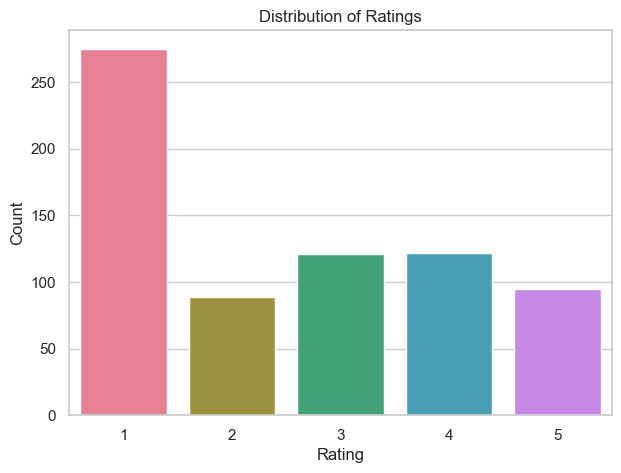

In [ ]:
sns.set(style="whitegrid")

# Define a color palette (you can adjust or add more colors as needed)
palette_colors = sns.color_palette("husl", len(df['Rating'].unique()))

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Rating', hue='Rating', palette=palette_colors, legend=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Following that, we'll delve into assessing the length of the reviews, as it may often correspond with the sentiment expressed or the level of detail provided in the feedback. Initially, we'll compute the length of each review, and then proceed to visualize the data.

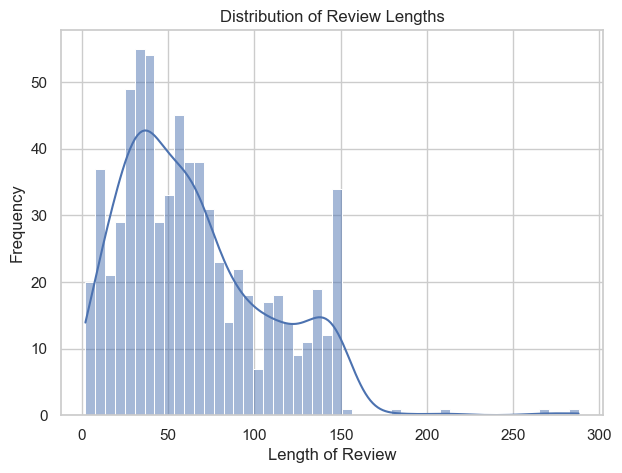

In [ ]:
df['Review Length'] = df['Review'].apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(7, 5))
sns.histplot(df['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')  # Adding a label for the y-axis
plt.show()

## Adding Sentiment Labels in the Data

The subsequent action involves assigning sentiments to the data. For this purpose, we can utilize TextBlob. TextBlob offers a polarity score that spans from -1 (indicating very negative) to 1 (indicating very positive) for a given text. Leveraging this score, we can categorize the sentiment of each review as either positive, neutral, or negative.

In [ ]:
from textblob import TextBlob

def textblob_sentiment_analysis(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

# Displaying the first few rows with the sentiment
df.head(5)

,Review,Rating,Review Length,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive


The dataset has been updated to incorporate sentiment labels for every review, categorized as Positive, Negative, or Neutral, determined by the polarity score computed using TextBlob.

## Analyzing App Reviews Sentiments
We'll now conduct sentiment analysis on the app reviews. We'll start by examining the distribution of sentiments throughout the dataset. This initial analysis will provide us with a fundamental insight into the overall sentiment trends present in the reviews:

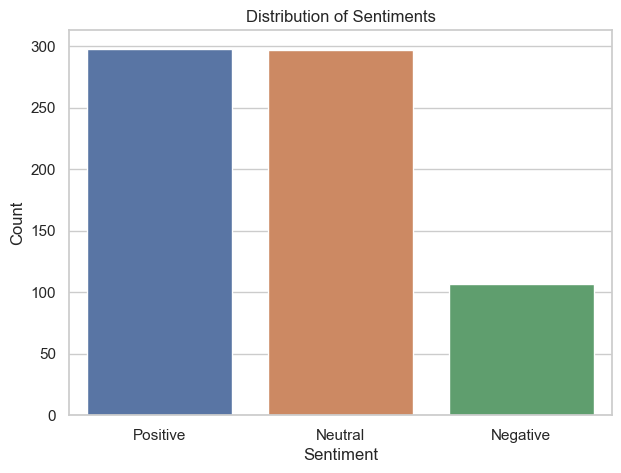

In [ ]:
# Analyzing the distribution of sentiments
sentiment_distribution = df['Sentiment'].value_counts()

# Plotting the distribution of sentiments with different colors for each count
plt.figure(figsize=(7, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, hue=sentiment_distribution.index, dodge=False)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

We can observe that despite the app receiving lower ratings, reviewers generally refrain from using a substantial number of negative words in their app reviews. 

Moving forward, we'll delve into examining the connection between sentiments and ratings. This examination aims to determine whether there exists a correlation between the emotional tone of the text and the numerical rating. To achieve this, we'll analyze how sentiments are dispersed across various rating levels.

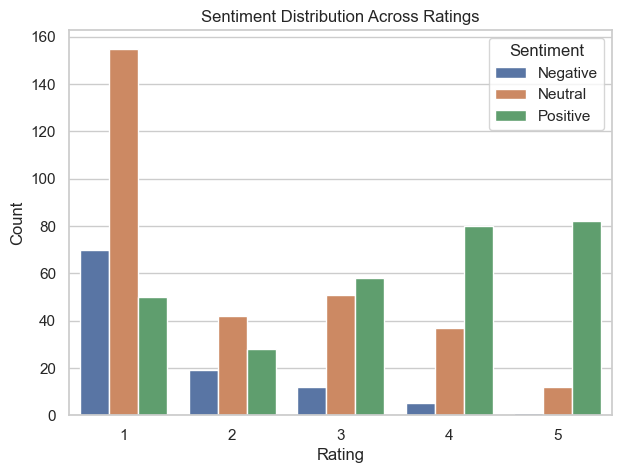

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

Let's conduct a textual analysis to uncover prevalent words or themes within each sentiment category. This process entails scrutinizing the most frequently appearing words in positive, negative, and neutral reviews by employing a word cloud visualization technique.

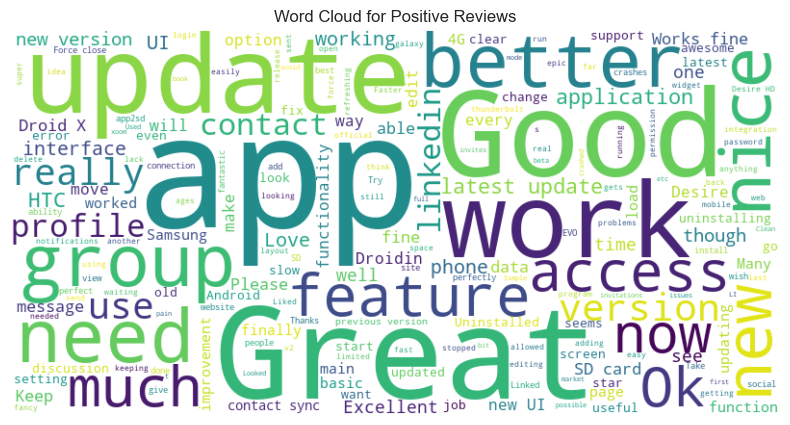

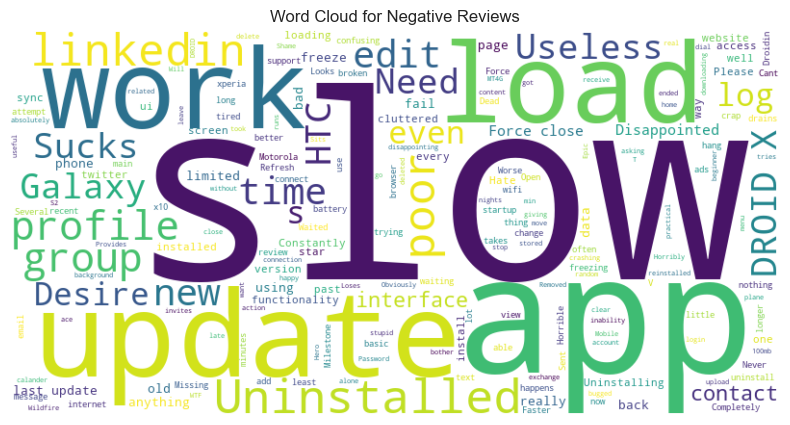

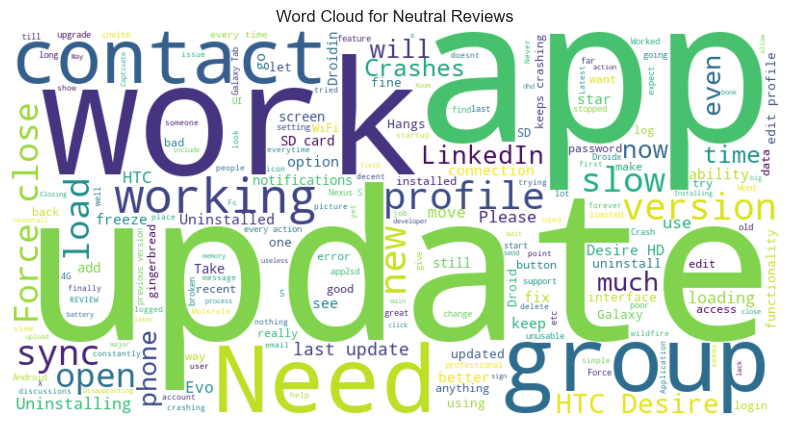

In [ ]:
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in df[df['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)